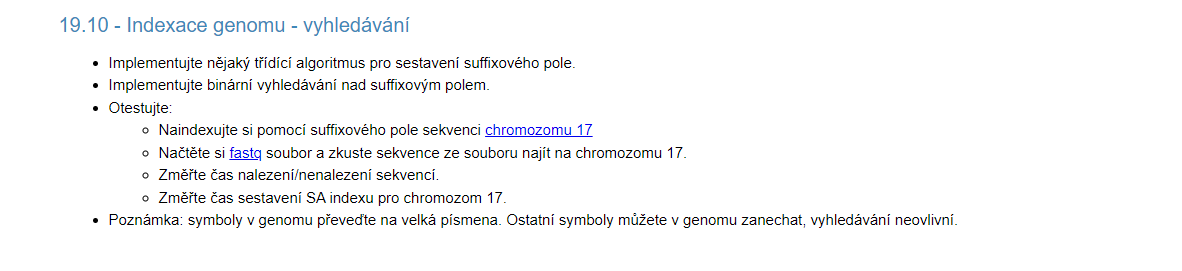

- Využít třídicí algortimus jakýkoliv (compare)
- Implementace binárního vyhledávání
- Načtení dat
- Vyzkoušet vyhledat a následně změřit čas

In [1]:
import functools

## Test text

In [2]:
T = 'abaaba'

# With substring

## Creation of suffix array

In [3]:
def create_suffix_array(T):
    #vygenerovat si jen pole čísel
    T = T + "$"
    suffixes = [(i-1, T[i-1:]) for i in range(len(T), 0, -1)]    
    return suffixes

In [4]:
array = create_suffix_array(T)

## Sort of suffix array

In [5]:
def sort_suffix_array(array):
    array = sorted(array, key=lambda x: x[1])
    return array 

In [6]:
sorted_array = sort_suffix_array(array)

In [7]:
sorted_array

[(6, '$'),
 (5, 'a$'),
 (2, 'aaba$'),
 (3, 'aba$'),
 (0, 'abaaba$'),
 (4, 'ba$'),
 (1, 'baaba$')]

In [8]:
def find_positions(array, index, P):
    positions = [array[index][0]]
    
    down = index
    while True:
        down -= 1
        if down < 0:
            break
        value = array[down][1]
        if not value.startswith(P):
            break
        else:
            positions.append(array[down][0])
             
    up = index
    while True:
        up += 1
        if up > (len(array) - 1):
            break
        value = array[up][1]
        if not value.startswith(P):
            break
        else:
            positions.append(array[up][0])
                
    return positions

In [9]:
def binary_search(array, P):
    mid = 0
    start = 0
    end = len(array)
    step = 0
    
    while (start <= end):
        step = step+1
        mid = (start + end) // 2
        if array[mid][1].startswith(P):
            return find_positions(array, mid, P)
        
        if P < array[mid][1]:
            end = mid - 1
            
        else:
            start = mid + 1
    return -1

In [10]:
positions = binary_search(sorted_array, 'ba')
positions

[4, 1]

# With index access

In [11]:
T = 'abaaba'
T = T + "$"

In [33]:
T

'abaaba$'

In [34]:
def compare(x0, x1):    
    if x0>(len(T)-1):
        return -1
    
    if x1>(len(T)-1):
        return 1
    
    if T[x0] > T[x1]:
        return 1
    
    if T[x0] < T[x1]:
        return -1
    return compare(x0+1, x1+1)

In [35]:
def create_suffix_array_index(T):
    indicies = list(range(len(T)))
    indicies = sorted(indicies, key=functools.cmp_to_key(compare))
    return indicies

In [36]:
array_index = create_suffix_array_index(T)

In [37]:
def find_positions_index(array_index, index, P, T):
    positions = [array_index[index]]
    
    #Prohledání směrem dolu
    down = index
    while True:
        down -= 1
        if down < 0:
            break
        index_value = array_index[down]
        if not startswith(index_value, T, P):
            break
        else:
            positions.append(array_index[down])
             
    #Prohledání směrem nahoru
    up = index
    while True:
        up += 1
        if up > (len(array) - 1):
            break
        index_value = array_index[up]
        if not startswith(index_value, T, P):
            break
        else:
            positions.append(array_index[up])                
    return positions

In [38]:
def startswith(index, T, P):
    for i in range(len(P)):
        pattern_c = P[i]
        ref_c = T[i+index]
        if pattern_c != ref_c:
            return False    
    return True

In [39]:
def isSmaller(index, T, P):
    for i in range(len(P)):
        pattern_c = P[i]
        ref_c = T[i+index]
        if pattern_c == ref_c:
            continue        
        if pattern_c < ref_c:
            return True
        else:
            return False

In [40]:
def binary_search_index(array_index, P, T):
    mid = 0
    start = 0
    end = len(array)
    step = 0
    
    while (start <= end):
        step = step+1
        mid = (start + end) // 2
        if startswith(array_index[mid], T, P):
            return find_positions_index(array_index, mid, P, T)
        
        if isSmaller(array_index[mid], T, P):
            end = mid - 1
            
        else:
            start = mid + 1
            
    return -1

In [41]:
positions = binary_search_index(array_index, 'ba', T)
positions

[4, 1]

# TO DO

In [65]:
def complement(seq):
    return seq.translate(str.maketrans({'T': 'A', 'A': 'T', 'G': 'C', 'C': 'G'}))

In [66]:
def reverse(seq):
    return seq[::-1]

In [67]:
def load_fastq(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        lines = [l.replace('\n', '') for l in lines]
        text = ''.join(lines)
        return find_all(text)

In [68]:
def find_all(text):
    seq = []
    while True:
        f_t = 'N:0:52'
        s_t = '+'
        len_f = len(f_t) 
        len_s = len(s_t)
        f = text.find(f_t)
        s = text.find(s_t)
        if f == -1 or s == -1:
            break
        seq.append(text[f+len_f:s])
        text = text[s+len_s:]
    return seq

In [69]:
def load_chromozome(path):
    chr17 = ''
    with open(path, 'r') as f:
        chr17 = f.readlines()
        chr17 = chr17[1:]
        chr17 = [l.replace('\n', '').lower() for l in chr17]
    return ''.join(chr17)

In [70]:
import time

In [71]:
def run_with_index(input_text, seq):
    input_text = input_text + "$"
    tic1 = time.time()
    array_index = create_suffix_array_index(input_text)
    toc1 = time.time()
    tic2 = time.time()
    positions = binary_search_index(array_index, seq, input_text)
    toc2 = time.time()
    return positions, (toc1 - tic2), (tic2 - toc2)

In [72]:
run_with_index('abaaba', 'ba')

([4, 1], 0.0, 0.0)

In [73]:
path_r1 = f'.//data//fastq//fastq_R1.fastq'

In [74]:
path_r2 = f'.//data//fastq//fastq_R2.fastq'

In [75]:
r1 = load_fastq(path_r1)
r1

['CTTTCCACTTGATAAGAGGTCCCAAGACTTAGTACCTGGAGGGTGAAATATTCTCCATCCAGTGGTTTCTTCTTTGGCTGGGGAGAGGAGCTGGTGTTGTTGGGCAGTGCTAGGAAAGAGGCAAGGAAAGGTGATAAAAGTGAATCTGAGG',
 'CTTTCCACTTGATAAGAGGTCCCAAGACTTAGTACCTGAAGGGTGAAATATTCTCCATCCAGTGGTTTCTTCTTTGGCTGGGGAGAGGAGCTGGTGTTGTTGGGCAGTGCTAGGAAAGAGGCAAGGAAAGGTGATAAAAGTGAATCTGAGG',
 'CAGGACTGCTCGAGCCGGGGAGGCAAAGGCTGCAGTAAGCCAAGATCACGCCACTCCACTCCAGCCTGGGCAACAAAGCGAGACCCAGTCTCAAAGAAAAAGAAAAAAAAAAAAAAAAGAAAAAAGAAATTGACCCTGAGCATAAAACAAG']

In [76]:
r2 = load_fastq(path_r2)
r2

['TAAGCAAGCAGGACAAGAAGCGGTGGAGGAGACCAAGGGTGCAGTTATGCCTCAGATTCACTTTTATCACCTTTCCTTGCCTCTTTCCTAGCACTGCCCAACAACACCAGCTCCTCTCCCCAGCCAAAGAAGAAACCACTGGATGGAGAAT',
 'TAAGCAAGCAGGACAAGAAGCGGTGGAGGAGACCAGGGTGCGGTTATGCCTCAGATTCACTTTTATCACCTTTCCTTGCCTCTTTCCTAGCACTGCCCAACAACACCAGCTCCTCTCCCCAGCCAAAGAAGAAACCACTGGATGGAGAATA',
 'CCTGGAGGATTTCATCTCTTGTATATGATGATCTGGATCCACCAAGACTTGTTTTATGCTCAGGGTCAATTTCTTTTTTCTTTTTTTTTTTTTTTTCTTTTTCTTTGAGACTGGGTCTCGCTTTGTTGCCCAGGCTGGAGTGGAGTGGCGT']

In [77]:
r2 = [complement(reverse(r)) for r in r2]

In [79]:
path = f'.\data\chr17\chr17.fa'
ref = load_chromozome(path);

In [83]:
len(ref)

83257441

In [87]:
ref = ref[0:int(len(ref)*0.05)]

In [88]:
len(ref)

416287

In [89]:
run_with_index(ref, r1[0])

(-1, 0.0, 0.0)